# Importing 3 data: clean, raw and additional


data_clean: clean data of 1k entry

raw_data: data of 100k entry

additional_data: additional table

In [ ]:
#Importing the datset we have New dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

filenames = ["pct_data_2018.csv", "pct_data_2019.csv",
    "pct_data_2020.csv",
    "pct_data_2021.csv",
    "pct_data_2022.csv",
    "pct_data_2023.csv",
    "pct_data_2024.csv"]

# Read each file into a DF and store them in a list
dataframes = [pd.read_csv (f, sep=';') for f in filenames]

# Concatenate all dfs into a single df
raw_data= pd.concat(dataframes, ignore_index=True)
raw_data
raw_data.columns
raw_data.shape

(109897, 33)

In [ ]:
# Try with ISO-8859-1 encoding
additional_data = pd.read_csv('raw_data.csv', encoding='ISO-8859-1', sep=';')
additional_data
additional_data.columns
additional_data.shape

(30000, 10)

In [ ]:
# Try with ISO-8859-1 encoding
clean_data = pd.read_csv('pct_data_initial.csv', encoding='ISO-8859-1', sep=';')
clean_data
clean_data.columns
clean_data.shape

(1353, 29)

# Statistical Operations About data

Calculating the range of age and time measure ( time only available for clean data in additional data)

In [ ]:
# Step 2: Calculate the age of individuals
current_year = 2024
raw_data['age'] = current_year - raw_data['year_of_birth']
clean_data['age'] = current_year - clean_data['year_of_birth']

age_range_raw_data = (raw_data['age'].min(), raw_data['age'].max())
age_range_clean_data = (clean_data['age'].min(), clean_data['age'].max())

print("\nAge range in raw_datat:", age_range_raw_data)
print("Age range in clean data:", age_range_clean_data)

# Step 3: Determine the range of collection dates from 'measuring_time'
# Convert measuring_time to datetime if it is not already
additional_data['measuring_time'] = pd.to_datetime(additional_data['measuring_time'])

date_range = (additional_data['measuring_time'].min(), additional_data['measuring_time'].max())

print("\nData collection range (measuring_time) in clean data:")
print("Start date:", date_range[0])
print("End date:", date_range[1])



Age range in raw_datat: (0.0, 113.0)
Age range in clean data: (2, 100)

Data collection range (measuring_time) in clean data:
Start date: 2023-01-01 00:44:00
End date: 2023-01-31 23:28:00


<ipython-input-36-e677ccf81fe9>:14: UserWarning: Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  additional_data['measuring_time'] = pd.to_datetime(additional_data['measuring_time'])


# Statistical visualization about data on clean data only

In [ ]:
# Create the 'age' column
clean_data['age'] = 2024 - clean_data['year_of_birth']

# Drop the 'year_of_birth' column without reassigning clean_data
clean_data.drop('year_of_birth', axis=1, inplace=True)
# Drop the 'order_number' column without reassigning clean_data
clean_data.drop('order_number', axis=1, inplace=True)
# Insert the 'age' column at the position of the 'year_of_birth' column
clean_data.insert(1, 'age', clean_data.pop('age'))
clean_data

,sex,age,PCT,IL6,HK,LYMABS,THROMB,MONOZY,HB,GRANAB,...,EOSABS,MakroE,MCH,GRANUL,EOSINO,LEUKO,BASOAB,MCV,MONABS,BASOPH
0,f,48,0.01,0.0,38.2,2.53,191,7.3,12.7,3.26,...,0.14,3.4,30.0,50.6,2.2,6.4,0.04,90.3,0.47,0.6
1,f,72,0.06,0.0,32.6,1.05,380,5.8,10.4,3.07,...,0.35,5.5,28.8,64.2,7.3,4.8,0.04,90.3,0.28,0.8
2,m,89,0.05,0.0,28.1,1.48,127,12.1,9.2,3.43,...,0.14,4.3,31.6,59.6,2.4,5.8,0.02,96.6,0.70,0.3
3,m,89,0.05,0.0,40.7,1.77,184,9.3,13.1,4.91,...,0.28,5.1,31.0,63.1,3.6,7.8,0.09,96.4,0.72,1.2
4,m,69,0.04,0.0,44.2,1.64,156,9.5,15.3,2.71,...,0.17,4.3,29.4,53.6,3.4,5.0,0.05,84.8,0.48,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1348,m,78,1.33,0.0,21.6,0.57,333,6.0,7.0,7.75,...,0.06,2.4,25.3,86.6,0.7,9.0,0.03,78.0,0.54,0.3
1349,f,20,0.04,0.0,36.7,2.21,181,7.7,12.8,4.08,...,0.39,3.4,30.3,56.0,5.3,7.3,0.05,86.8,0.56,0.7
1350,f,75,0.07,0.0,37.8,0.32,169,12.2,12.8,5.05,...,0.01,3.7,28.3,82.1,0.2,6.1,0.02,83.6,0.75,0.3
1351,f,85,0.12,0.0,36.1,0.80,350,8.8,12.4,8.74,...,0.10,3.3,30.2,82.3,0.9,10.6,0.05,88.0,0.93,0.5


In [ ]:
# Define a function that categorizes sepsis based on PCT values
def categorize_sepsis(pct_value):
    if pct_value > 2:
        return 'P'  # Yes, sepsis likely
    elif pct_value >= 0.1:
        return 'I'  # Maybe, intermediate or gray area
    else:
        return 'N'  # No, sepsis unlikely

# Apply this function to the 'PCT' column to create a new categorical column
clean_data['sepsis_cat'] = clean_data['PCT'].apply(categorize_sepsis)

# Insert the 'sepsis_cat' column before the 'PCT' column
pct_index = clean_data.columns.get_loc('PCT')  # Find the index of 'PCT' column
clean_data.insert(pct_index, 'sepsis_cat', clean_data.pop('sepsis_cat'))


In [ ]:
missing_count = clean_data['sepsis_cat'].isna().sum()
print("Number of missing 'sepsis_cat' values:", missing_count)

Number of missing 'sepsis_cat' values: 0


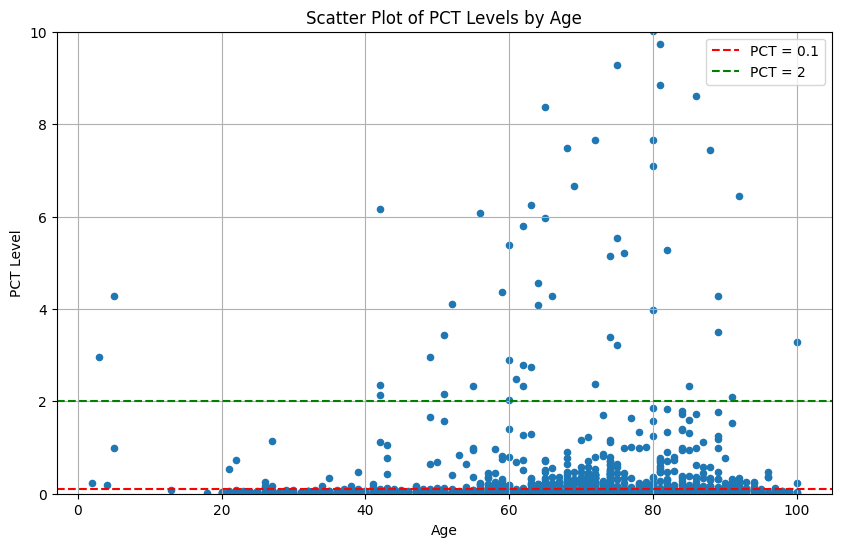

In [ ]:
#PLOT PCT LEVELS BY AGE \ add lines by the 0.5 and 2
clean_data.plot.scatter(x='age', y='PCT', figsize=(10, 6))
plt.ylim(0, 10)  # Set limits for y-axis to remove outliers
plt.axhline(y=0.1, color='r', linestyle='--', label='PCT = 0.1')  # Add horizontal line at PCT = 0.1
plt.axhline(y=2, color='g', linestyle='--', label='PCT = 2')  # Add horizontal line at PCT = 2
plt.grid(True)
plt.title('Scatter Plot of PCT Levels by Age')
plt.xlabel('Age')
plt.ylabel('PCT Level')
plt.legend()
plt.show()

sex
m    723
f    630
Name: count, dtype: int64


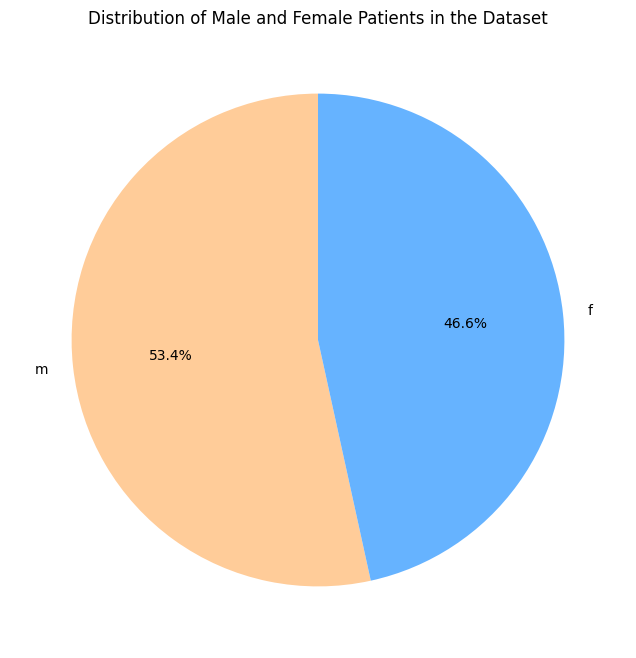

In [ ]:
# Count the number of females and males in the dataset
count_by_sex = clean_data['sex'].value_counts()

# Print the result
print(count_by_sex)

# Define colors for the pie chart
colors = ['#ffcc99', '#66b3ff']  # Orange for one gender and Blue for the other

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(count_by_sex, labels=count_by_sex.index, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Male and Female Patients in the Dataset')
plt.show()


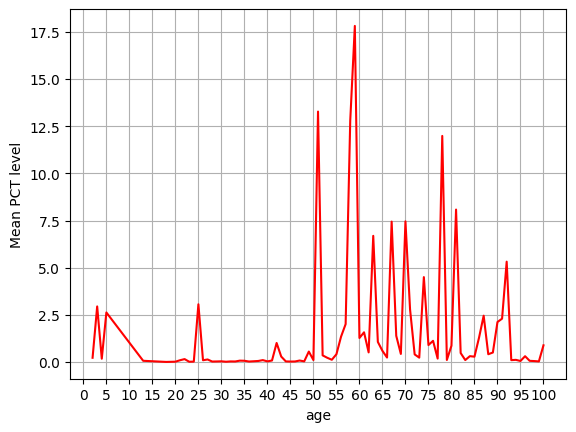

In [ ]:
# Group the data by 'age' and calculate the mean 'PCT' for each group
age_grouped = clean_data.groupby('age')['PCT'].mean()

# Plot the result as a line
ax = age_grouped.plot(color="r")
plt.xticks(np.arange(0, 100.1, 5))
ax.set_ylabel("Mean PCT level")
plt.grid(True)
plt.show()

In [ ]:
sepsis_cat_counts = clean_data['sepsis_cat'].value_counts()
print(sepsis_cat_counts)

sepsis_cat
N    806
I    441
P    106
Name: count, dtype: int64


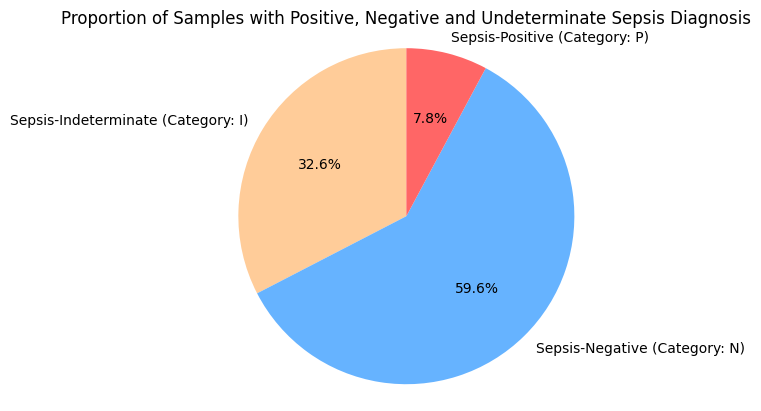

In [ ]:
# Pie Charts
# Proportion of Samples with High vs. Normal vs Low Sepsis levels: Compare the percentage of samples with sepsis.
# Count the frequency of each sepsis category
sepsis_counts = clean_data['sepsis_cat'].value_counts().sort_index()

# Define labels for the pie chart
labels = ['Sepsis-Indeterminate (Category: I)', 'Sepsis-Negative (Category: N)', 'Sepsis-Positive (Category: P)']

# Define colors for the pie chart
colors = ['#ffcc99', '#66b3ff', '#ff6666']  # Orange, Blue, and another contrasting color

# Create the pie chart
plt.pie(sepsis_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Proportion of Samples with Positive, Negative and Undeterminate Sepsis Diagnosis')
plt.show()


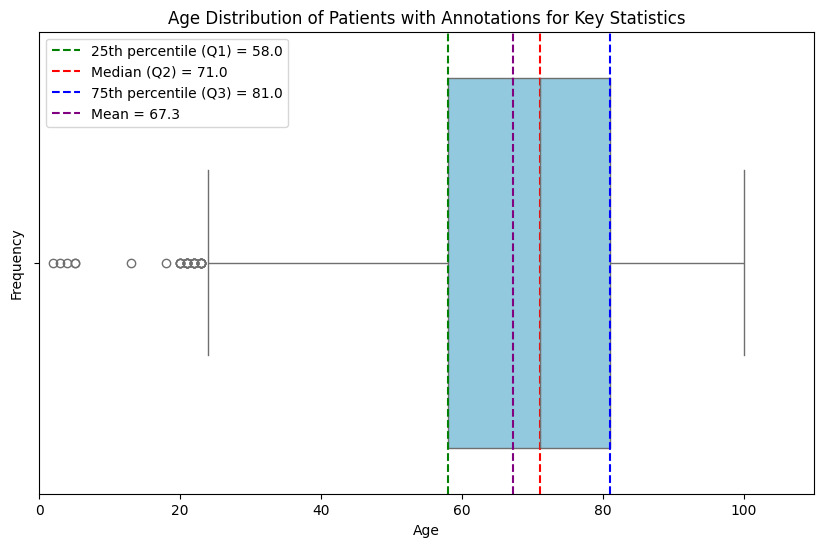

In [ ]:
# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=clean_data['age'], color='skyblue')

# Calculate and annotate the quartiles and mean
mean_age = clean_data['age'].mean()
median_age = clean_data['age'].median()
first_quartile = clean_data['age'].quantile(0.25)
third_quartile = clean_data['age'].quantile(0.75)

# Set the x-axis to start at 0
plt.xlim(0, clean_data['age'].max() + 10)  # Extend a bit beyond the max for better visualization

# Add lines for mean and specific quartiles
plt.axvline(x=first_quartile, color='green', linestyle='--', label=f'25th percentile (Q1) = {first_quartile:.1f}')
plt.axvline(x=median_age, color='red', linestyle='--', label=f'Median (Q2) = {median_age:.1f}')
plt.axvline(x=third_quartile, color='blue', linestyle='--', label=f'75th percentile (Q3) = {third_quartile:.1f}')
plt.axvline(x=mean_age, color='purple', linestyle='--', label=f'Mean = {mean_age:.1f}')

# Add legend and titles
plt.legend()
plt.title('Age Distribution of Patients with Annotations for Key Statistics')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Show the plot
plt.show()


In [ ]:
clean_data

,sex,age,sepsis_cat,PCT,IL6,HK,LYMABS,THROMB,MONOZY,HB,...,EOSABS,MakroE,MCH,GRANUL,EOSINO,LEUKO,BASOAB,MCV,MONABS,BASOPH
0,f,48,N,0.01,0.0,38.2,2.53,191,7.3,12.7,...,0.14,3.4,30.0,50.6,2.2,6.4,0.04,90.3,0.47,0.6
1,f,72,N,0.06,0.0,32.6,1.05,380,5.8,10.4,...,0.35,5.5,28.8,64.2,7.3,4.8,0.04,90.3,0.28,0.8
2,m,89,N,0.05,0.0,28.1,1.48,127,12.1,9.2,...,0.14,4.3,31.6,59.6,2.4,5.8,0.02,96.6,0.70,0.3
3,m,89,N,0.05,0.0,40.7,1.77,184,9.3,13.1,...,0.28,5.1,31.0,63.1,3.6,7.8,0.09,96.4,0.72,1.2
4,m,69,N,0.04,0.0,44.2,1.64,156,9.5,15.3,...,0.17,4.3,29.4,53.6,3.4,5.0,0.05,84.8,0.48,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1348,m,78,I,1.33,0.0,21.6,0.57,333,6.0,7.0,...,0.06,2.4,25.3,86.6,0.7,9.0,0.03,78.0,0.54,0.3
1349,f,20,N,0.04,0.0,36.7,2.21,181,7.7,12.8,...,0.39,3.4,30.3,56.0,5.3,7.3,0.05,86.8,0.56,0.7
1350,f,75,N,0.07,0.0,37.8,0.32,169,12.2,12.8,...,0.01,3.7,28.3,82.1,0.2,6.1,0.02,83.6,0.75,0.3
1351,f,85,I,0.12,0.0,36.1,0.80,350,8.8,12.4,...,0.10,3.3,30.2,82.3,0.9,10.6,0.05,88.0,0.93,0.5


In [ ]:
#Hot encoding for clean data
# Creating dummy variables if necessary
clean_data = pd.get_dummies(clean_data, columns=['sex'])
clean_data.drop(columns=['sex_f'], inplace=True)
clean_data.columns

# Data subsets for different sepsis categories
pct_data_sepsis_yes = clean_data[clean_data['sepsis_cat'] == 'P']
pct_data_sepsis_no = clean_data[clean_data['sepsis_cat'] == 'N']
combined_data = pd.concat([pct_data_sepsis_yes, pct_data_sepsis_no], axis=0)
print(clean_data)

      age sepsis_cat   PCT  IL6    HK  LYMABS  THROMB  MONOZY    HB  GRANAB  \
0      48          N  0.01  0.0  38.2    2.53     191     7.3  12.7    3.26   
1      72          N  0.06  0.0  32.6    1.05     380     5.8  10.4    3.07   
2      89          N  0.05  0.0  28.1    1.48     127    12.1   9.2    3.43   
3      89          N  0.05  0.0  40.7    1.77     184     9.3  13.1    4.91   
4      69          N  0.04  0.0  44.2    1.64     156     9.5  15.3    2.71   
...   ...        ...   ...  ...   ...     ...     ...     ...   ...     ...   
1348   78          I  1.33  0.0  21.6    0.57     333     6.0   7.0    7.75   
1349   20          N  0.04  0.0  36.7    2.21     181     7.7  12.8    4.08   
1350   75          N  0.07  0.0  37.8    0.32     169    12.2  12.8    5.05   
1351   85          I  0.12  0.0  36.1    0.80     350     8.8  12.4    8.74   
1352   25          N  0.00  0.0  39.2    0.00     409     0.0  13.7    0.00   

      ...  MakroE   MCH  GRANUL  EOSINO  LEUKO  BAS

# Choosing the features to work with / Feature Importance

Clustering Analysis / the clusters didn't show anything, will leave them here but not to be mentionned in the rapport

In [ ]:
# Clustering Analysis: Use clustering techniques (e.g., k-means, hierarchical clustering) to see if there are natural clusters in the data.
# This might help identify patterns or groups of patients with similar profiles.
# Data Scaling first:
# Clustering algorithms such as k-means rely on distance calculations, so it's important to scale the data
from sklearn.preprocessing import StandardScaler


# Separating out the features and excluding the target variable and 'PCT'
features = combined_data.drop(['sepsis_cat'], axis=1)

# Standardizing the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

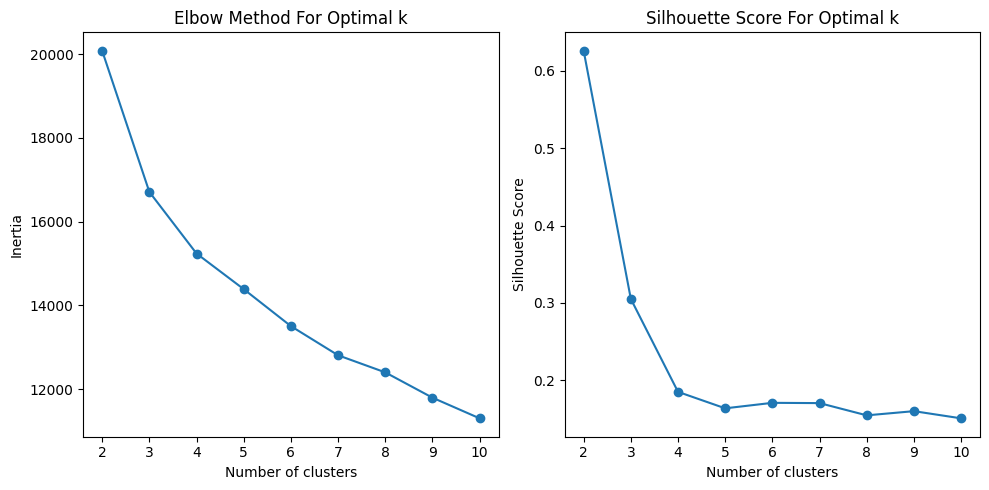

In [ ]:
#Perform k-means clustering and use the Elbow method and Silhouette Score to determine the optimal number of clusters.
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Trying different values of k
inertia = []
silhouette_scores = []
K_range = range(2, 11)  # Checking for k from 2 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(features_scaled, kmeans.labels_))

# Plotting the Elbow Method
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

# Plotting the Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o')
plt.title('Silhouette Score For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


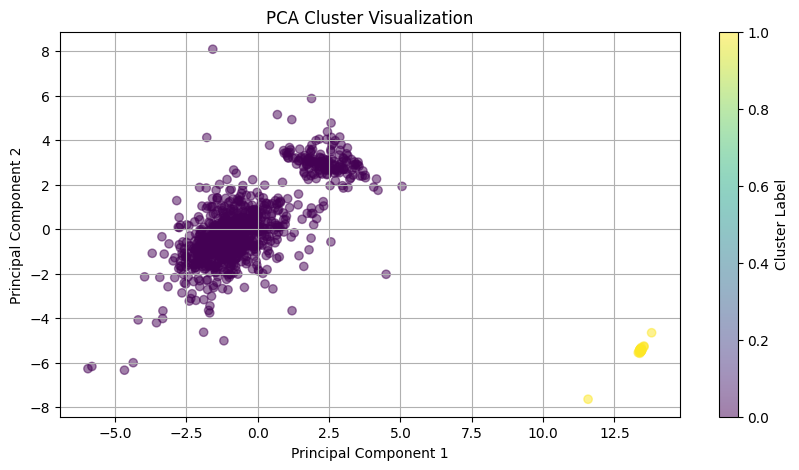

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Fit k-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(features_scaled)
# PCA for dimensionality reduction for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_scaled)

# Plotting the PCA reduced data
plt.figure(figsize=(10, 5))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=cluster_labels, cmap='viridis', marker='o', alpha=0.5)
plt.title('PCA Cluster Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()

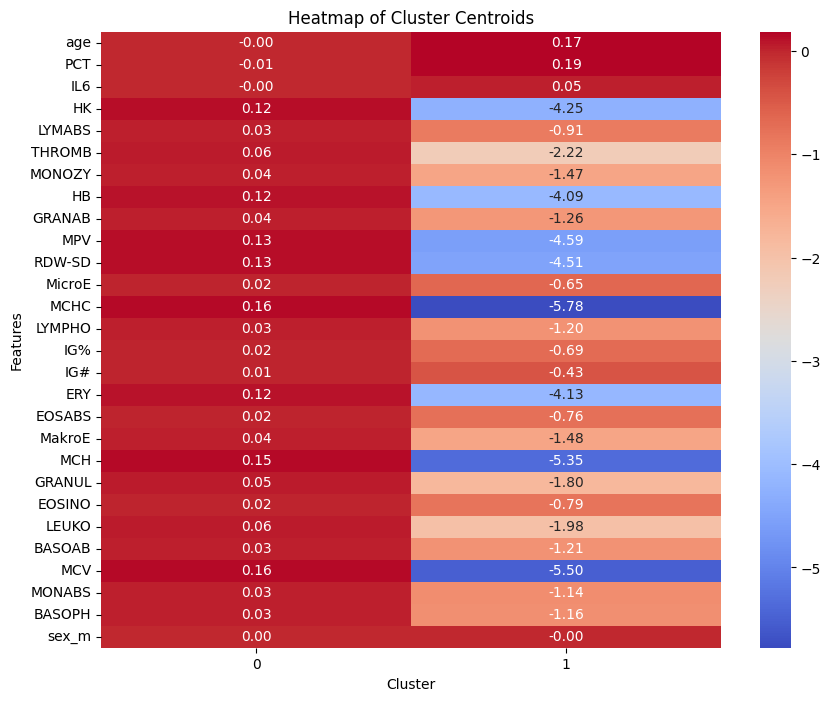

In [ ]:
# Create a DataFrame with the centroids and the feature names for easier interpretation
centroids = kmeans.cluster_centers_
features_names = features.columns
centroid_df = pd.DataFrame(centroids, columns=features_names)

# Heatmap of Cluster Centroids
plt.figure(figsize=(10, 8))
sns.heatmap(centroid_df.T, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Cluster Centroids')
plt.xlabel('Cluster')
plt.ylabel('Features')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


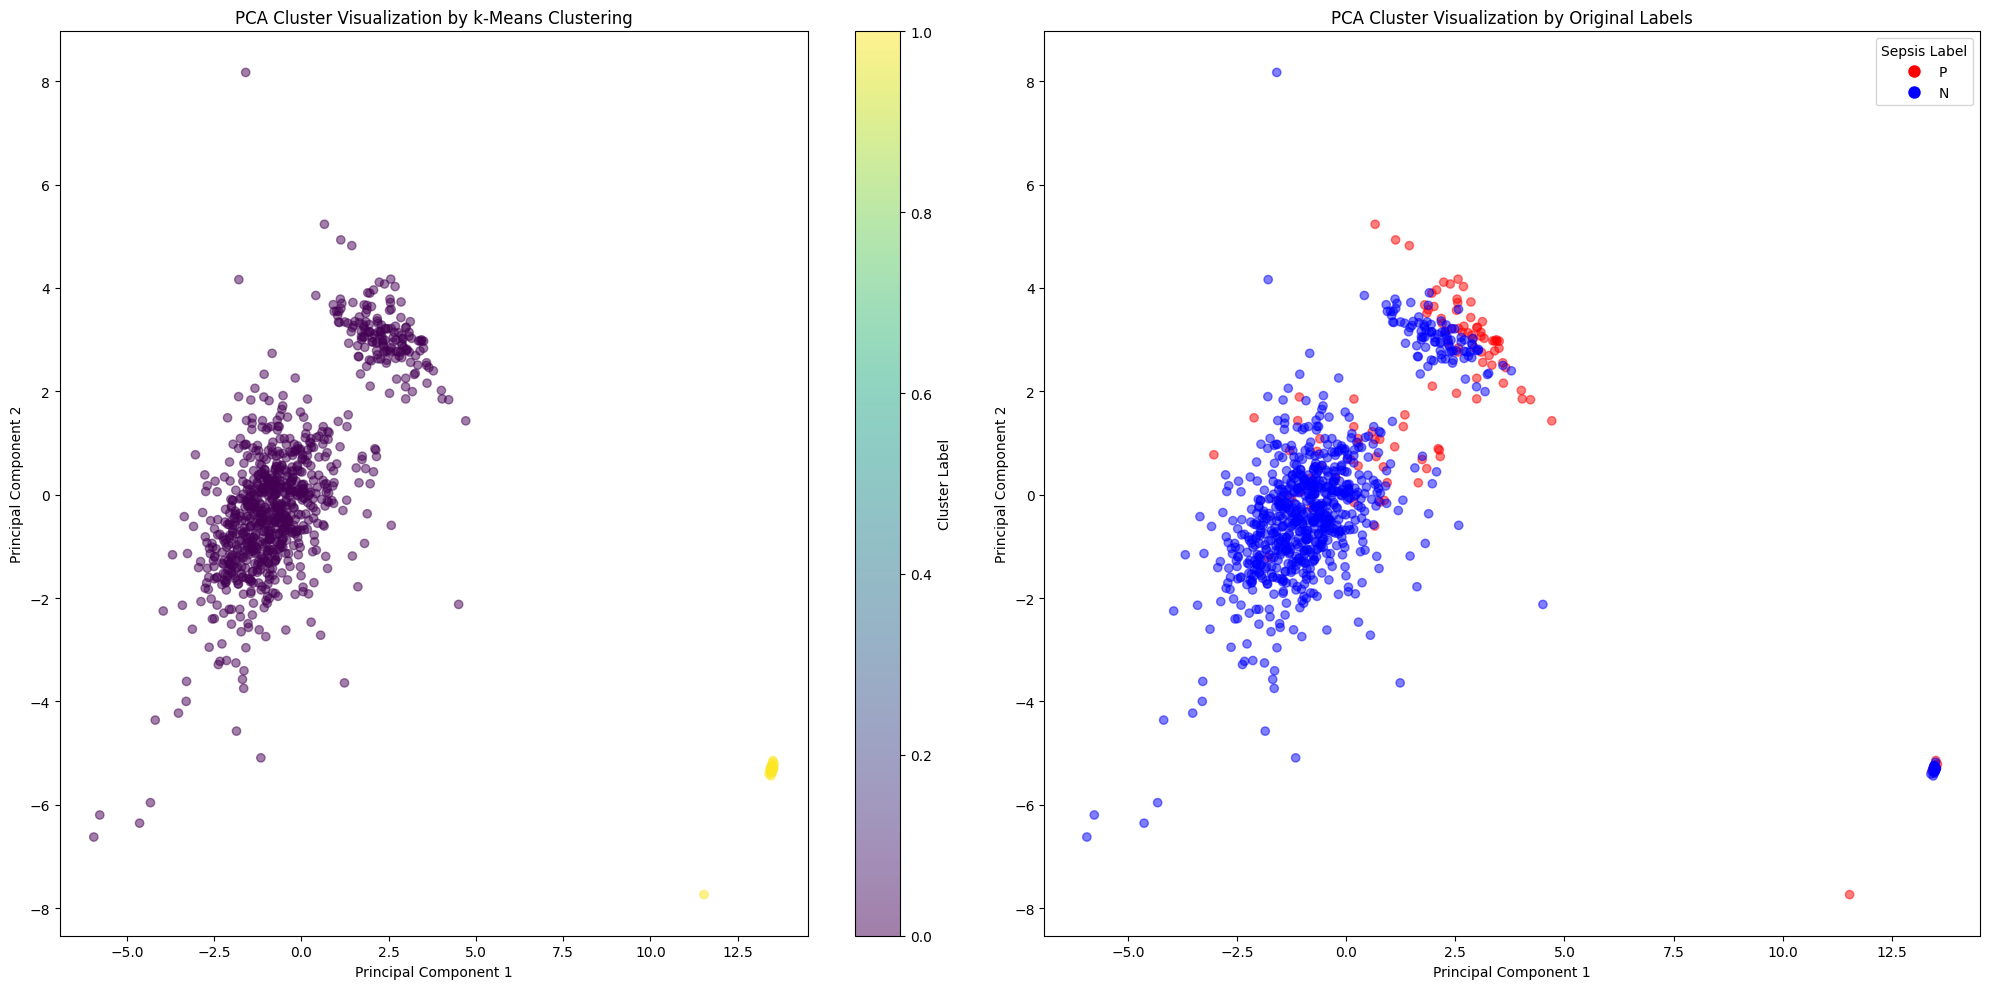

In [ ]:
# Separating out the features
features = combined_data.drop(['sepsis_cat', 'PCT'], axis=1)
labels = combined_data['sepsis_cat']  # Save the original labels for comparison

# Standardizing the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Perform k-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(features_scaled)

# PCA for dimensionality reduction for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_scaled)

# Plotting the PCA reduced data by cluster labels
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=cluster_labels, cmap='viridis', marker='o', alpha=0.5)
plt.title('PCA Cluster Visualization by k-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')

# Map original labels to colors
label_color_dict = {'P': 'red', 'N': 'blue'}  # Adjusted to include only 'Y' and 'N'
label_colors = [label_color_dict.get(label, 'gray') for label in labels]  # 'gray' for any unexpected labels

# Plot 2: Data colored by original sepsis labels
plt.subplot(1, 2, 2)
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=label_colors, marker='o', alpha=0.5)
plt.title('PCA Cluster Visualization by Original Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Create a legend for the second plot
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in label_color_dict.values()]
plt.legend(handles, label_color_dict.keys(), title='Sepsis Label')

plt.tight_layout()
plt.show()


In [ ]:
#Cluster Centroids Analysis
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(features_scaled)
centroids = kmeans.cluster_centers_

# Create a DataFrame with the centroids and the feature names for easier interpretation
centroid_df = pd.DataFrame(centroids, columns=combined_data.columns.drop(['sepsis_cat','PCT']))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


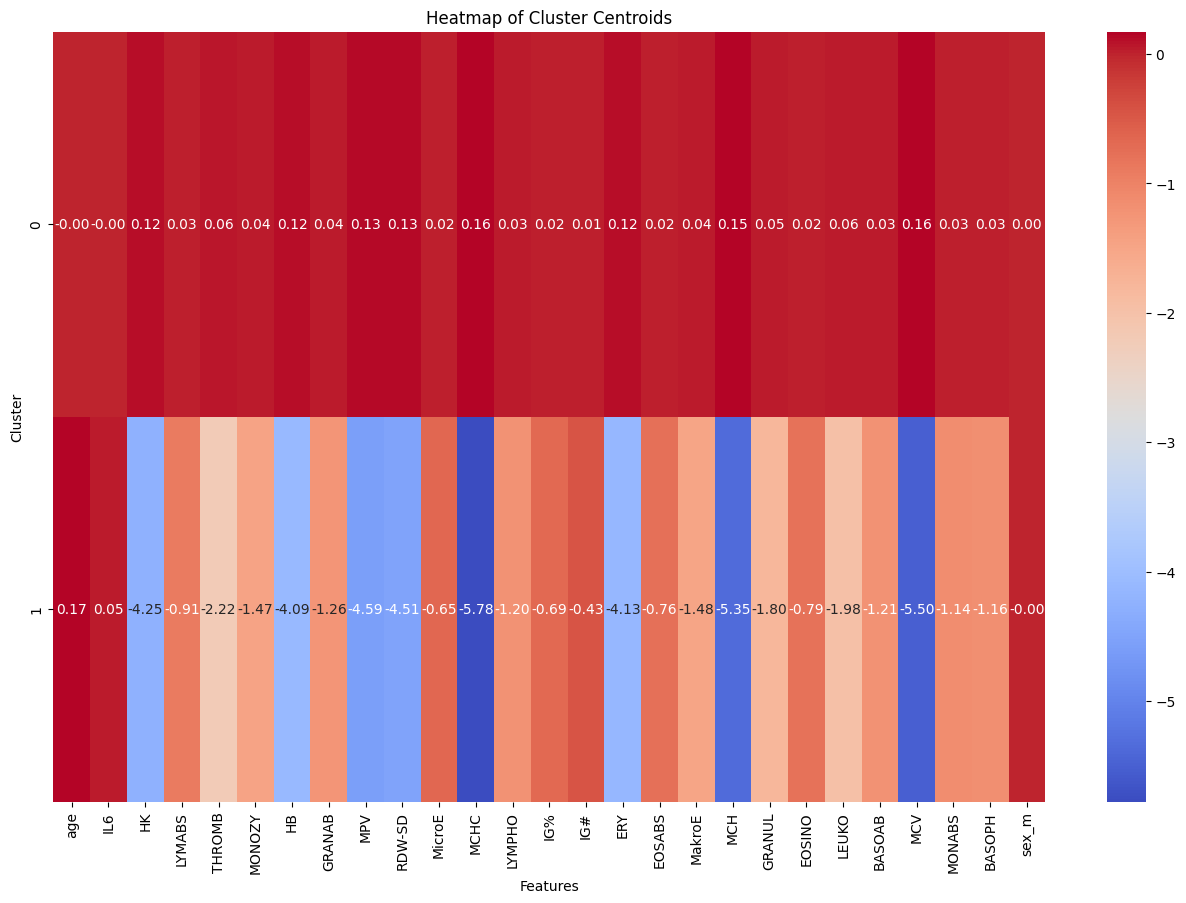

In [ ]:
# Assuming 'centroid_df' is the DataFrame of centroids you have from your k-means clustering
plt.figure(figsize=(16, 10))
sns.heatmap(centroid_df, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap of Cluster Centroids')
plt.ylabel('Cluster')
plt.xlabel('Features')
plt.show()
#Cluster 0 is YES
#Cluster 1 is NO

In [ ]:
# Add the cluster labels to the original DataFrame
combined_data['cluster'] = kmeans.labels_

# Analyze the distribution of original sepsis categories within each cluster
cluster_analysis = combined_data.groupby(['cluster', 'sepsis_cat']).size().unstack(fill_value=0)
print(cluster_analysis)


sepsis_cat    N    P
cluster             
0           787  100
1            19    6


In [ ]:
# Remove the 'cluster' column from the DataFrame
combined_data.drop('cluster', axis=1, inplace=True)

Box plot method

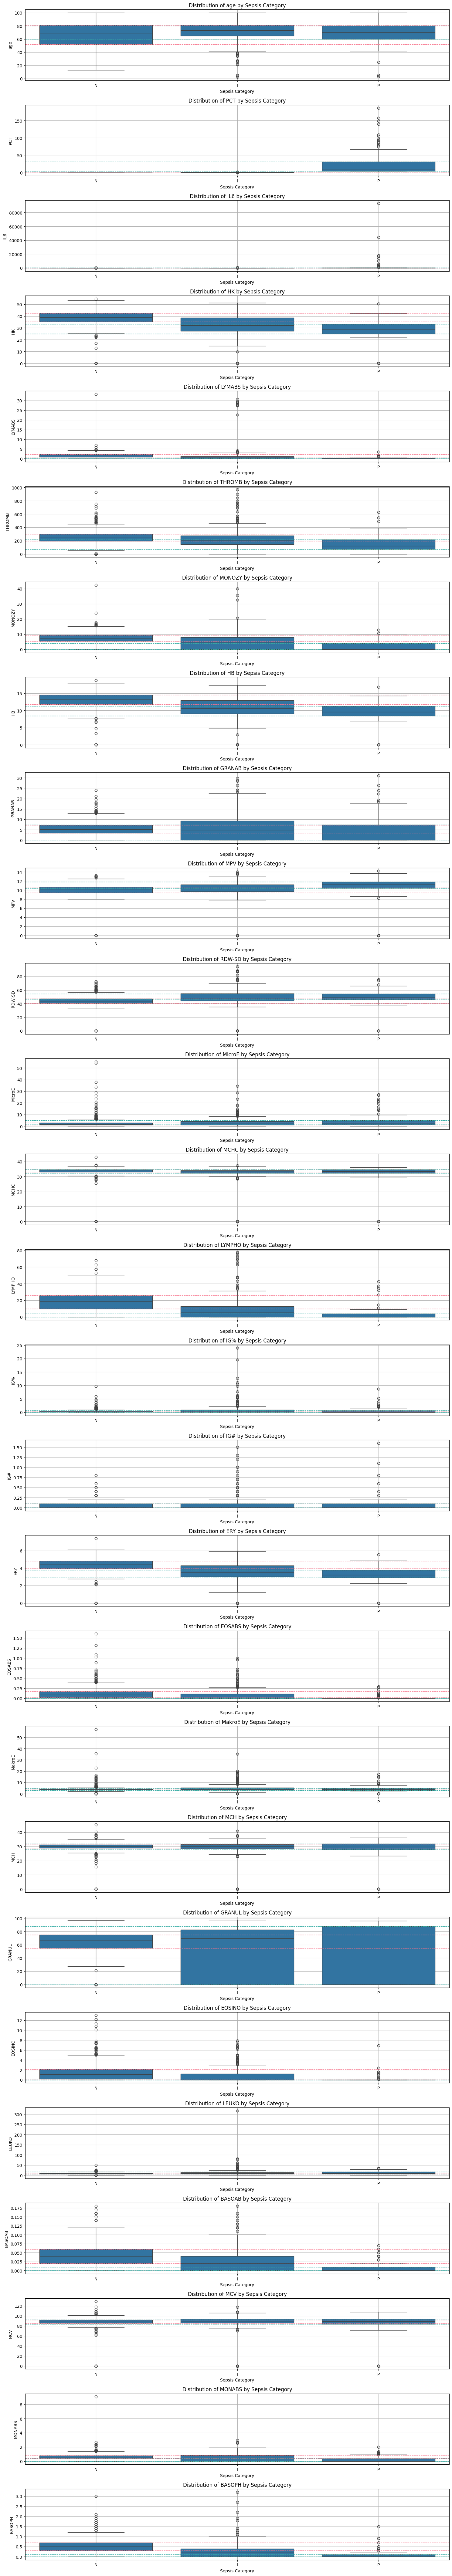

In [ ]:
# Load your dataset
# Replace 'your_dataset.csv' with the path to your dataset file
# List of columns to plot, excluding 'sex' and 'sepsis_cat' which are categorical
features = ['age', 'PCT', 'IL6', 'HK', 'LYMABS', 'THROMB', 'MONOZY', 'HB', 'GRANAB',
            'MPV', 'RDW-SD', 'MicroE', 'MCHC', 'LYMPHO', 'IG%', 'IG#', 'ERY', 'EOSABS',
            'MakroE', 'MCH', 'GRANUL', 'EOSINO', 'LEUKO', 'BASOAB', 'MCV', 'MONABS', 'BASOPH']

# List of colors for the dashed lines (one for N and one for Y)
line_colors = sns.color_palette("husl", 2)

# Create a figure to hold the plots
plt.figure(figsize=(15, 85))

# Generate a boxplot for each feature
for index, feature in enumerate(features):
    plt.subplot(len(features), 1, index + 1)
    sns.boxplot(x='sepsis_cat', y=feature, data=clean_data)

    # Add lines only for N and Y categories
    for i, category in enumerate(['N', 'P']):
        if category in clean_data['sepsis_cat'].unique():
            percentile_25 = clean_data[clean_data['sepsis_cat'] == category][feature].quantile(0.25)
            percentile_75 = clean_data[clean_data['sepsis_cat'] == category][feature].quantile(0.75)

            # Add horizontal dashed lines at the 25th and 75th percentiles with different colors
            plt.axhline(y=percentile_25, color=line_colors[i], linestyle='--', linewidth=1)
            plt.axhline(y=percentile_75, color=line_colors[i], linestyle='--', linewidth=1)

    plt.title(f'Distribution of {feature} by Sepsis Category')
    plt.xlabel('Sepsis Category')
    plt.ylabel(feature)
    plt.grid(True)  # Enable grid lines

# Show the plots
plt.tight_layout()
plt.show()


Linear correalation / Persons correlation

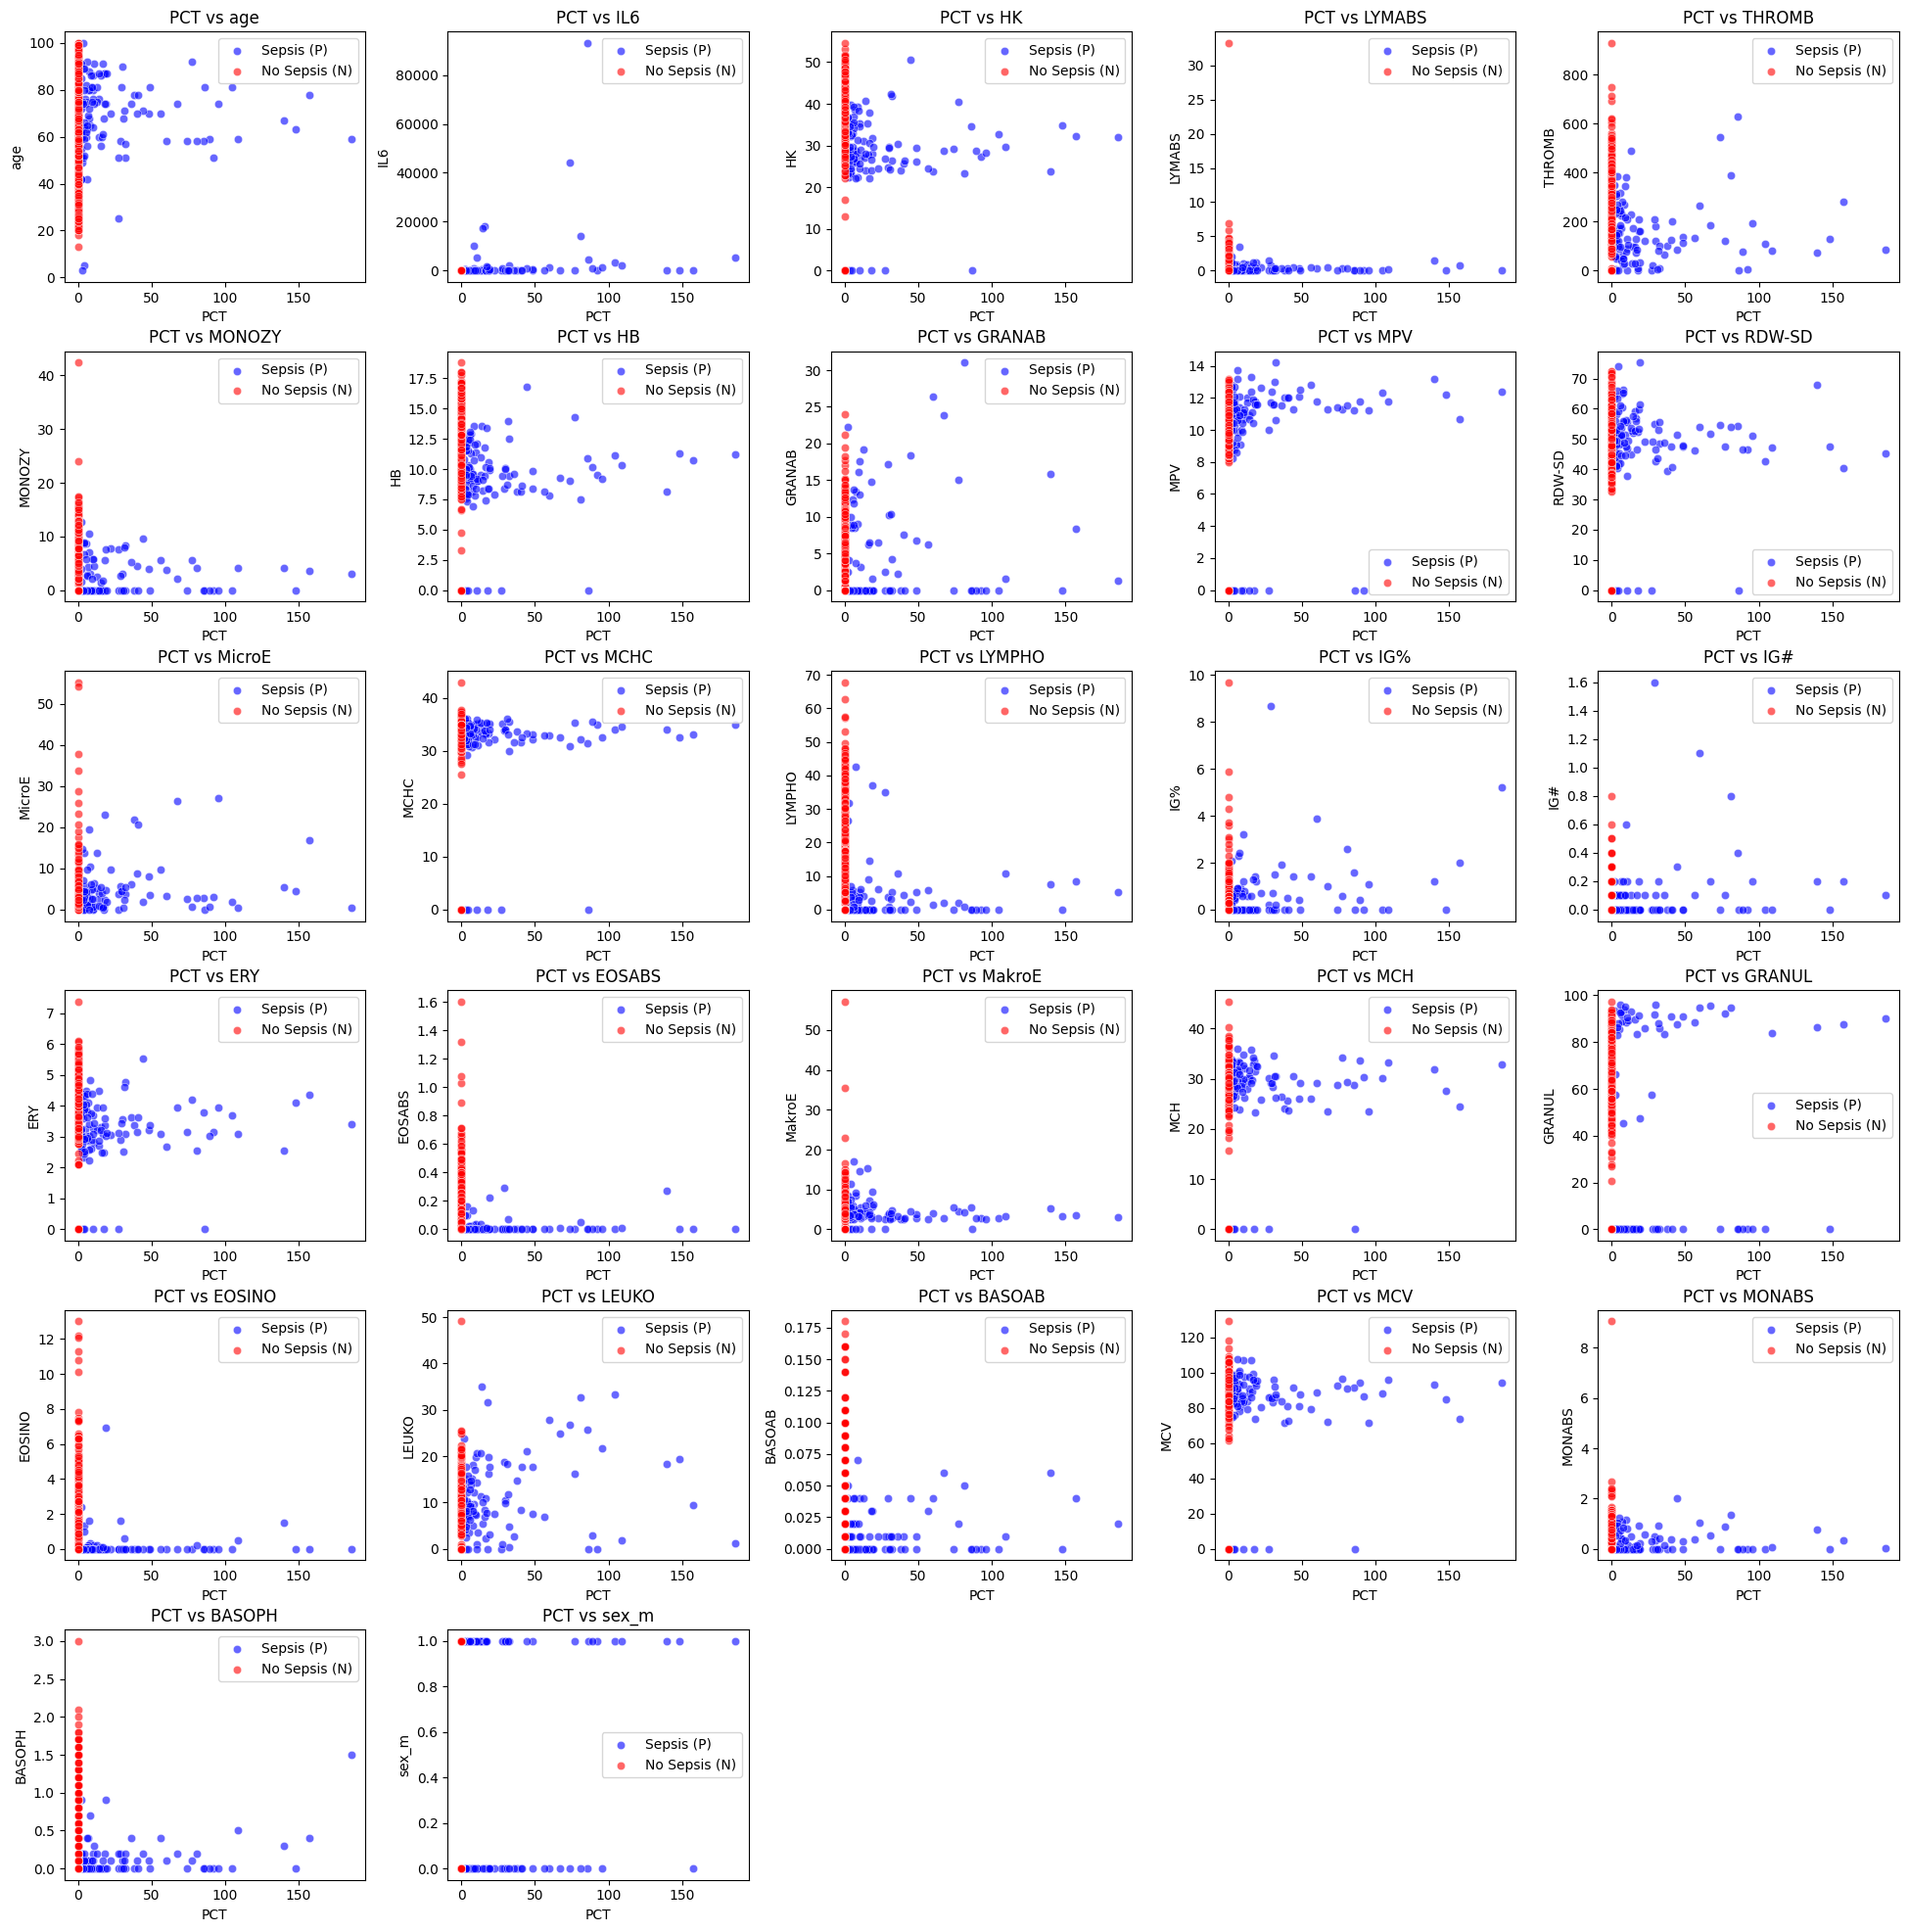

In [ ]:
# Updating feature columns if necessary
feature_columns = ['age', 'IL6', 'HK', 'LYMABS', 'THROMB', 'MONOZY', 'HB', 'GRANAB', 'MPV',
                   'RDW-SD', 'MicroE', 'MCHC', 'LYMPHO', 'IG%', 'IG#', 'ERY', 'EOSABS',
                   'MakroE', 'MCH', 'GRANUL', 'EOSINO', 'LEUKO', 'BASOAB', 'MCV', 'MONABS',
                   'BASOPH', 'sex_m']

# Plotting
fig, axs = plt.subplots(len(feature_columns) // 5 + 1, 5, figsize=(20, 20))
fig.tight_layout(pad=3.0)
axs = axs.flatten()

for i, feature in enumerate(feature_columns):
    sns.scatterplot(x='PCT', y=feature, data=pct_data_sepsis_yes, ax=axs[i], alpha=0.6, color='blue', label='Sepsis (P)')
    sns.scatterplot(x='PCT', y=feature, data=pct_data_sepsis_no, ax=axs[i], alpha=0.6, color='red', label='No Sepsis (N)')
    axs[i].set_title(f'PCT vs {feature}')
    axs[i].set_xlabel('PCT')
    axs[i].set_ylabel(feature)
    axs[i].legend()  # This adds a legend to each subplot

for ax in axs[len(feature_columns):]:
    ax.set_visible(False)

plt.show()

<ipython-input-59-d2f362cadbd6>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pct_correlations.values, y=pct_correlations.index, palette='viridis')


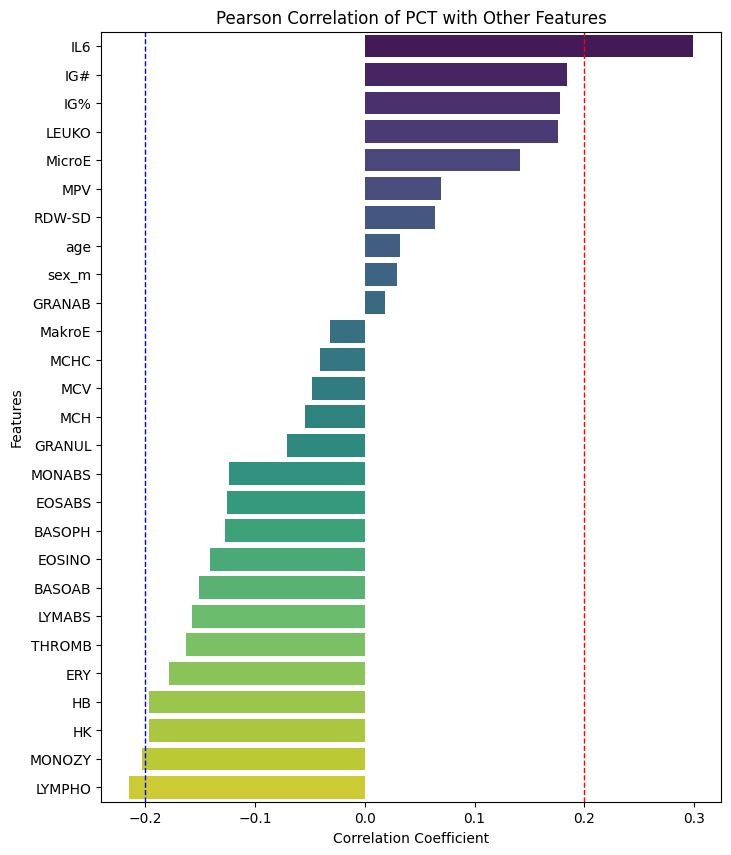

IL6       0.298976
IG#       0.183808
IG%       0.178069
LEUKO     0.176103
MicroE    0.141660
MPV       0.069778
RDW-SD    0.064411
age       0.032137
sex_m     0.029103
GRANAB    0.018597
MakroE   -0.031603
MCHC     -0.040997
MCV      -0.047637
MCH      -0.054658
GRANUL   -0.070760
MONABS   -0.123381
EOSABS   -0.125362
BASOPH   -0.127541
EOSINO   -0.141291
BASOAB   -0.151020
LYMABS   -0.157127
THROMB   -0.162907
ERY      -0.177774
HB       -0.195986
HK       -0.196169
MONOZY   -0.202850
LYMPHO   -0.214210
dtype: float64


In [ ]:
#All rows
#Feature correlation PCT vs others

# Make a copy of pct_data to work with, ensuring pct_data remains unaffected
pct_data_corr = combined_data.copy()

# Drop the 'sex','sepsis_num', 'sepsis_cat' column from the copy without reassigning pct_data
pct_data_corr.drop('sepsis_cat', axis=1, inplace=True)

# Calculate the correlation of PCT with all other features in the copy
pct_correlations = pct_data_corr.drop('PCT', axis=1).apply(lambda x: x.corr(pct_data_corr['PCT']))

# Sort the values
pct_correlations = pct_correlations.sort_values(ascending=False)

# Plotting the correlations
plt.figure(figsize=(8, 10))
sns.barplot(x=pct_correlations.values, y=pct_correlations.index, palette='viridis')
# Add vertical lines at 0.2 and -0.2
plt.axvline(x=0.2, color='red', linestyle='--', linewidth=1)
plt.axvline(x=-0.2, color='blue', linestyle='--', linewidth=1)
plt.title('Pearson Correlation of PCT with Other Features')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()
print(pct_correlations)

Spearman's correlation

<ipython-input-60-f0a4839a19df>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=values, y=labels, palette='viridis')


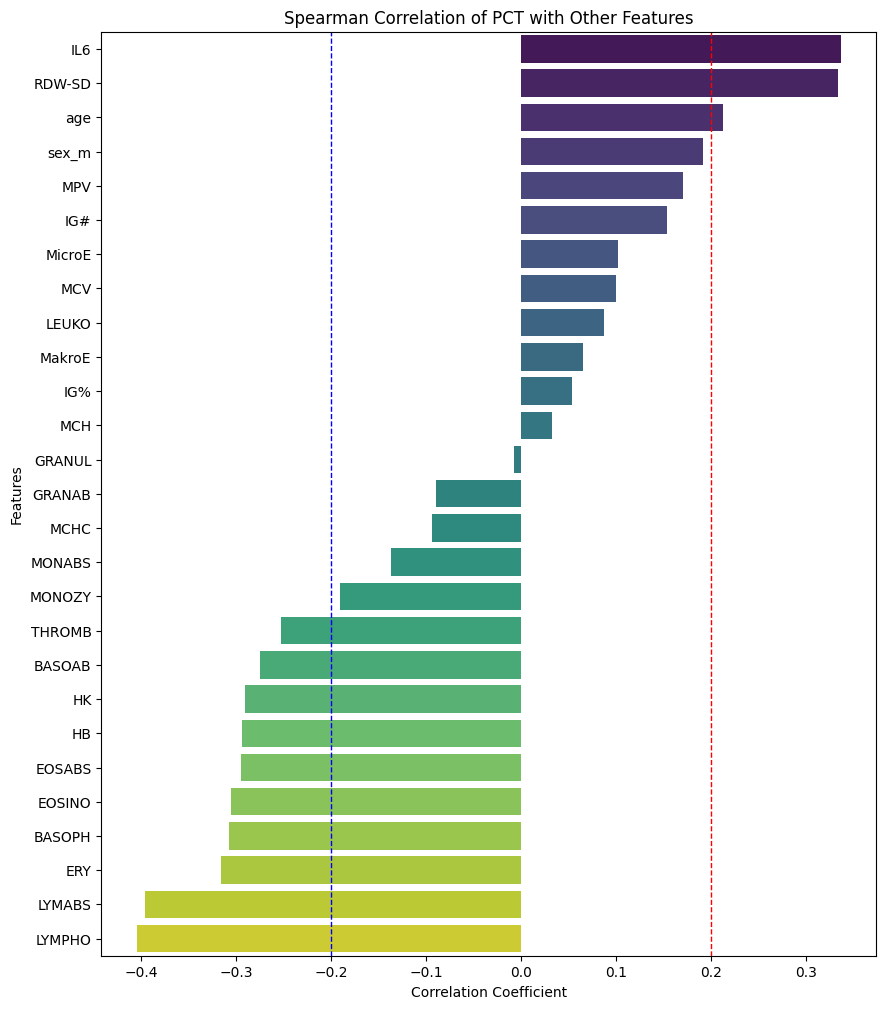

[('IL6', 0.33677613337105977), ('RDW-SD', 0.3332662621010859), ('age', 0.21280022576459465), ('sex_m', 0.1910085843360732), ('MPV', 0.169948527331709), ('IG#', 0.15320412873483516), ('MicroE', 0.10207274335468282), ('MCV', 0.09956930621484698), ('LEUKO', 0.0870639524545997), ('MakroE', 0.06540751085686994), ('IG%', 0.0533314943978689), ('MCH', 0.03207625955774111), ('GRANUL', -0.007690725585344499), ('GRANAB', -0.08958380745670631), ('MCHC', -0.09392529366715986), ('MONABS', -0.1373369738531031), ('MONOZY', -0.19121914069659898), ('THROMB', -0.2525900117738716), ('BASOAB', -0.2750451251726951), ('HK', -0.2908034460701652), ('HB', -0.2943703060760581), ('EOSABS', -0.2947531663265147), ('EOSINO', -0.30564169885267384), ('BASOPH', -0.30800045106857155), ('ERY', -0.3156808581970747), ('LYMABS', -0.3964873333204385), ('LYMPHO', -0.4050566274555477)]


In [ ]:
#Spearman's correlation for non linear relationships
from scipy.stats import spearmanr

# List all columns in the dataset except 'PCT'
features = [col for col in combined_data.columns if col not in ['PCT', 'sepsis_cat']]

# Initialize a dictionary to store Spearman's correlation coefficients
spearman_correlations = {}

# Calculate Spearman's correlation for each feature against 'PCT'
for feature in features:
    # Check if the column has no missing values
    if combined_data[feature].notna().all() and combined_data['PCT'].notna().all():
        correlation, _ = spearmanr(combined_data['PCT'], combined_data[feature])
        spearman_correlations[feature] = correlation
# Create a sorted list from the dictionary
sorted_features = sorted(spearman_correlations.items(), key=lambda x: x[1], reverse=True)

# Unpack the sorted items for plotting
labels, values = zip(*sorted_features)

# Plotting the correlations
plt.figure(figsize=(10, 12))  # Adjusting the figure size to match your image
sns.barplot(x=values, y=labels, palette='viridis')
# Add vertical lines at 0.2 and -0.2
plt.axvline(x=0.2, color='red', linestyle='--', linewidth=1)
plt.axvline(x=-0.2, color='blue', linestyle='--', linewidth=1)
plt.title('Spearman Correlation of PCT with Other Features')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()
print(sorted_features)

Random Forest

In [ ]:
#Random Forests classifier using raw data ( Excluding 'Maybe' sample) + feature importance score of the model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Remove 'Maybe' cases from the dataset
data = combined_data

# Prepare features and target
X = data.drop(['sepsis_cat', 'PCT'], axis=1)
y = data['sepsis_cat'].map({'P': 1, 'N': 0})  # Encode target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Display feature importances
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)
# Check for unique values in the 'sepsis_cat' column
print(data['sepsis_cat'].unique())

# Check if any NaNs after mapping
y.isna().sum()

Accuracy: 0.9562841530054644
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       160
           1       1.00      0.65      0.79        23

    accuracy                           0.96       183
   macro avg       0.98      0.83      0.88       183
weighted avg       0.96      0.96      0.95       183

        importance
IL6       0.182758
THROMB    0.080842
HK        0.067550
MPV       0.064849
HB        0.059804
LYMPHO    0.054651
RDW-SD    0.048226
ERY       0.039826
LYMABS    0.037407
GRANUL    0.035917
LEUKO     0.035677
MicroE    0.029905
age       0.026121
MakroE    0.023825
MONOZY    0.023242
MCV       0.023068
MCHC      0.022637
EOSINO    0.022230
MCH       0.021570
BASOPH    0.021202
MONABS    0.019185
GRANAB    0.015228
EOSABS    0.014850
IG%       0.012802
BASOAB    0.007368
IG#       0.004981
sex_m     0.004280
['P' 'N']


0

XGBoost

Accuracy: 0.9508196721311475
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       160
           1       0.94      0.65      0.77        23

    accuracy                           0.95       183
   macro avg       0.94      0.82      0.87       183
weighted avg       0.95      0.95      0.95       183



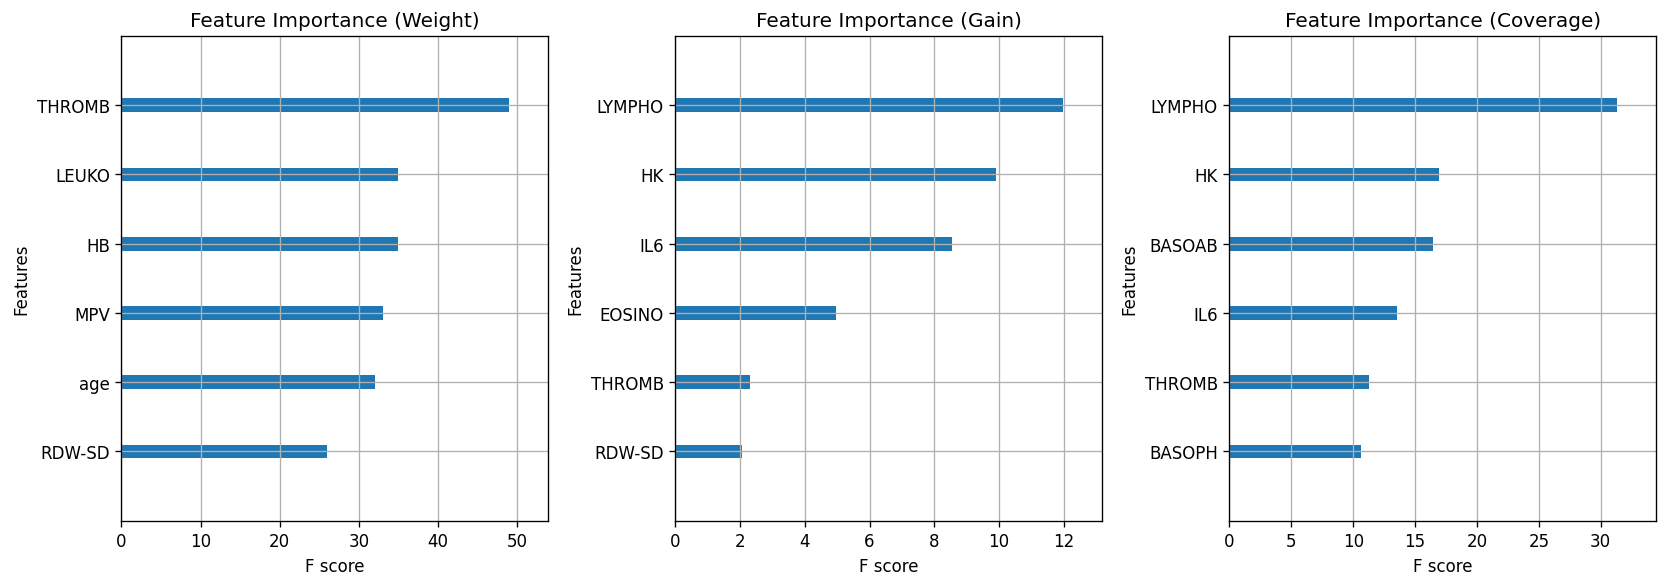

In [ ]:
import xgboost as xgb

# Assuming 'pct_data' is your DataFrame
# Remove 'Maybe' cases from the dataset
data = combined_data

# Prepare features and target
X = data.drop(['sepsis_cat', 'PCT'], axis=1)
y = data['sepsis_cat'].map({'P': 1, 'N': 0})  # Encode target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an XGBoost Classifier
xg_cl = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, seed=42)
xg_cl.fit(X_train, y_train)

# Evaluate the model
y_pred = xg_cl.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Create a figure for 3 subplots (one for each importance type)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 5), dpi=120)

# Weight
xgb.plot_importance(xg_cl, importance_type='weight', max_num_features=6, title='Feature Importance (Weight)', ax=axes[0], show_values=False)

# Gain
xgb.plot_importance(xg_cl, importance_type='gain', max_num_features=6, title='Feature Importance (Gain)', ax=axes[1], show_values=False)

# Coverage
xgb.plot_importance(xg_cl, importance_type='cover', max_num_features=6, title='Feature Importance (Coverage)', ax=axes[2], show_values=False)

# Adjust layout
plt.tight_layout()
plt.show()

PCA

Explained Variance Ratio: [0.28212159 0.13989975 0.10342162 0.06740347 0.0536639  0.04492423
 0.04213991 0.0373993  0.03421608 0.03284878]
Cumulative Explained Variance: [0.28212159 0.42202134 0.52544296 0.59284642 0.64651033 0.69143456
 0.73357447 0.77097376 0.80518985 0.83803862]


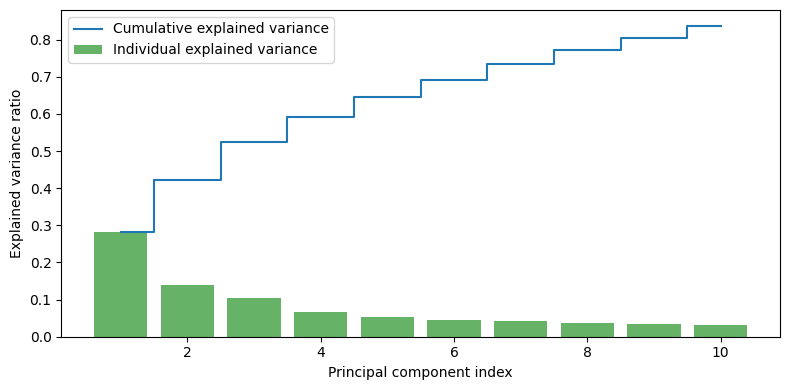

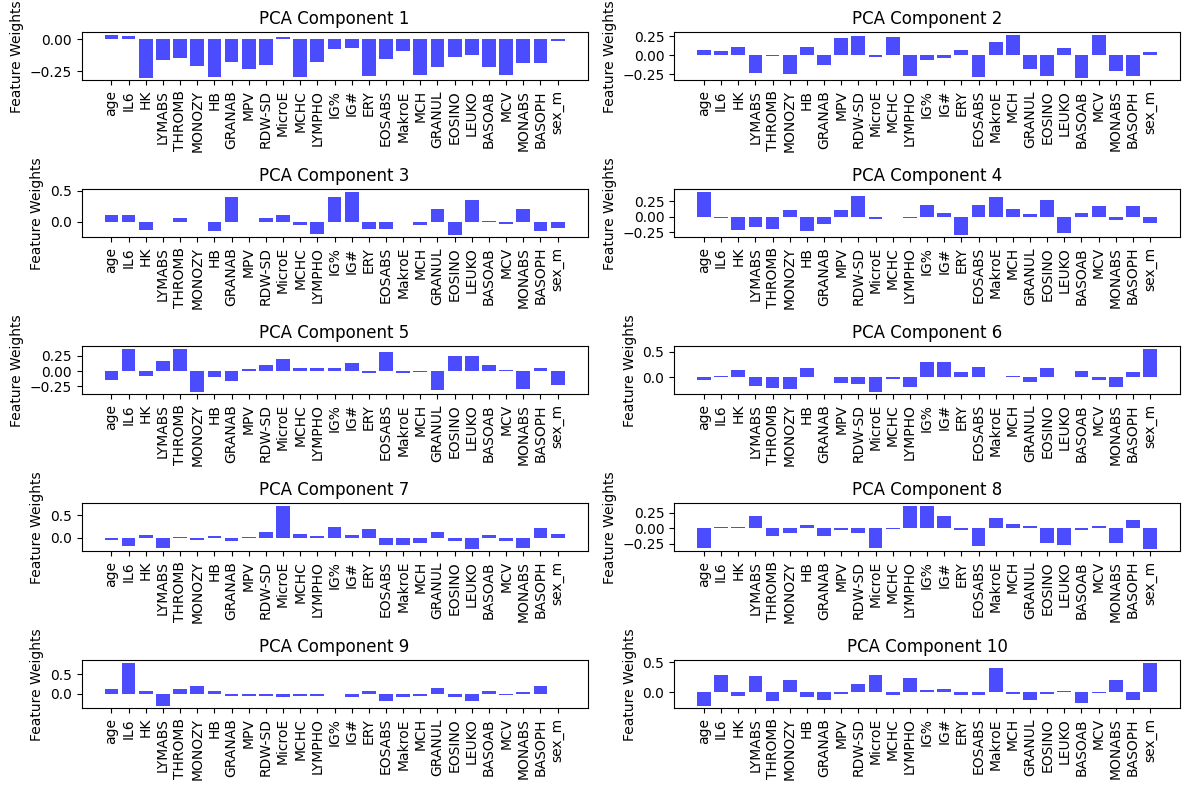

In [ ]:
from sklearn.decomposition import PCA

data = combined_data

# Prepare features and target
X = data.drop(['sepsis_cat', 'PCT'], axis=1)
y = data['sepsis_cat'].map({'P': 1, 'N': 0})  # Encode target variable

# Standardizing the features
X_scaled = StandardScaler().fit_transform(X)

# PCA with 10 components
pca = PCA(n_components=10)  # Setting components to 10
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Cumulative variance explains
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print("Cumulative Explained Variance:", cumulative_variance)

# Plotting the explained variance
plt.figure(figsize=(8, 4))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.6, color='g', label='Individual explained variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()

# Feature contribution to components
plt.figure(figsize=(12, 8))
components = pca.components_
num_features = X.shape[1]
x_ticks = np.arange(num_features)
for i in range(components.shape[0]):
    plt.subplot(5, 2, i + 1)  # arrange plots in 5 rows and 2 columns
    plt.bar(x_ticks, components[i, :], label=f'Component {i+1}', color='blue', alpha=0.7)
    plt.xticks(ticks=x_ticks, labels=X.columns, rotation=90)
    plt.title(f'PCA Component {i+1}')
    plt.ylabel('Feature Weights')
plt.tight_layout()
plt.show()


Deep Learning Model

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,905 (46.50 KB)

 Trainable params: 11,905 (46.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6757 - loss: 0.6304 - val_accuracy: 0.8493 - val_loss: 0.4268
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8900 - loss: 0.3683 - val_accuracy: 0.8562 - val_loss: 0.3442
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9090 - loss: 0.3031 - val_accuracy: 0.8767 - val_loss: 0.2934
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8968 - loss: 0.2954 - val_accuracy: 0.8836 - val_loss: 0.2611
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9309 - loss: 0.1790 - val_accuracy: 0.8973 - val_loss: 0.2410
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9056 - loss: 0.2439 - val_accuracy: 0.9178 - val_loss: 0.2027
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9173 - loss: 0.1870 - val_accuracy: 0.9247 - val_loss: 0.1869
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9339 - loss: 0.1841 - val_accuracy: 0.9384 - val_loss

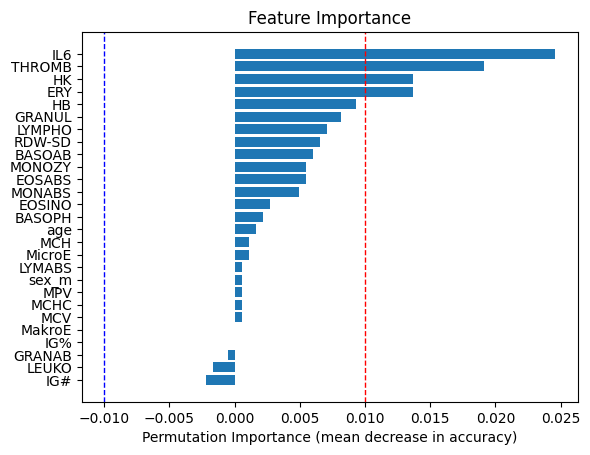

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, ClassifierMixin
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score, make_scorer

class KerasClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, model):
        self.model = model

    def fit(self, X, y, **kwargs):
        self.model.fit(X, y, **kwargs)
        self.classes_ = np.unique(y)  # Save the classes encountered during fit
        return self

    def predict(self, X, **kwargs):
        predictions = self.model.predict(X, **kwargs)
        return (predictions > 0.5).astype('int32')

    def score(self, X, y, **kwargs):
        y_pred = self.predict(X)
        return accuracy_score(y, y_pred)


# Assuming 'combined_data' is already loaded and prepared
data = combined_data
X = data.drop(['sepsis_cat', 'PCT'], axis=1)
y = data['sepsis_cat'].map({'P': 1, 'N': 0}).values  # Encode target variable as array

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Building the Neural Network
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Wrap the model using the customized wrapper
wrapped_model = KerasClassifierWrapper(model)
model.summary()

# Early stopping
early_stopping_monitor = EarlyStopping(
    monitor='val_loss',
    patience=10,  # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restores model weights from the epoch with the best value of the monitored quantity.
)

# Train the model
wrapped_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1, callbacks=[early_stopping_monitor])

# Evaluating the Model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

# Define the custom scoring function
custom_scorer = make_scorer(accuracy_score, greater_is_better=True)

# Calculate permutation importance
results = permutation_importance(wrapped_model, X_test, y_test, n_repeats=10, random_state=42, scoring=custom_scorer)

# Visualize the importances
importance_sorted_idx = np.argsort(results.importances_mean)
plt.barh(np.arange(len(results.importances_mean)), results.importances_mean[importance_sorted_idx], align='center')
plt.yticks(np.arange(len(results.importances_mean)), [X.columns[i] for i in importance_sorted_idx])
plt.xlabel("Permutation Importance (mean decrease in accuracy)")
plt.axvline(x=0.01, color='red', linestyle='--', linewidth=1)
plt.axvline(x=-0.01, color='blue', linestyle='--', linewidth=1)
plt.title("Feature Importance")
plt.show()
